In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
# Download the dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv

--2025-04-14 12:41:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [text/plain]
Saving to: ‘monthly-sunspots.csv’

monthly-sunspots.cs 100%[===================>]  43.98K  --.-KB/s    in 0.001s  

2025-04-14 12:41:45 (47.0 MB/s) - ‘monthly-sunspots.csv’ saved [45039/45039]



In [4]:
df = pd.read_csv('monthly-sunspots.csv', header=0, index_col=0, parse_dates=True)
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


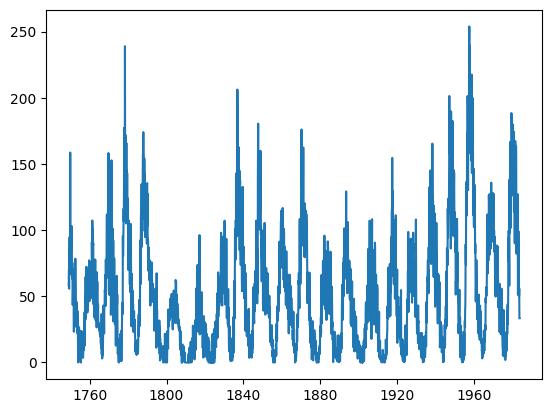

In [5]:
# monthly sunspots
plt.plot(df['Sunspots'])

## ACF and PACF

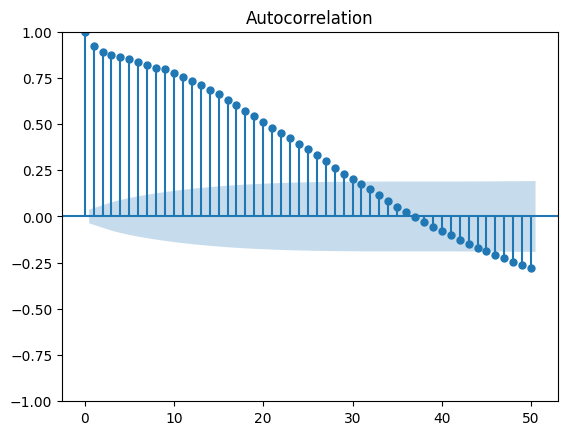

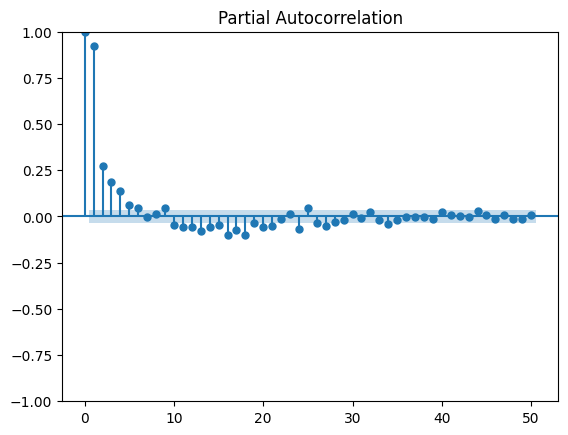

In [6]:
# ACF and PACF plots (optional, for order selection)
plot_acf(df['Sunspots'], lags=50)
plt.show()
plot_pacf(df['Sunspots'], lags=50)
plt.show()

In [7]:
# Prepare data for ARIMA
train_data = df['Sunspots'][:250]
test_data = df['Sunspots'][250:]

In [28]:
# Fit the ARIMA model --- ARMA Mod 20. For ARMA 30, use (3,0,0)
model = ARIMA(train_data, order=(2, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
predictions = model_fit.predict(
    start=len(train_data),
    end=len(df)-1
    )
predictions

,predicted_mean
1769-11-01,148.791591
1769-12-01,151.488963
1770-01-01,151.905088
1770-02-01,151.234217
1770-03-01,151.471583
...,...
1983-08-01,151.451311
1983-09-01,151.451311
1983-10-01,151.451311
1983-11-01,151.451311


In [30]:
# Evaluate the model (example: using RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 109.226


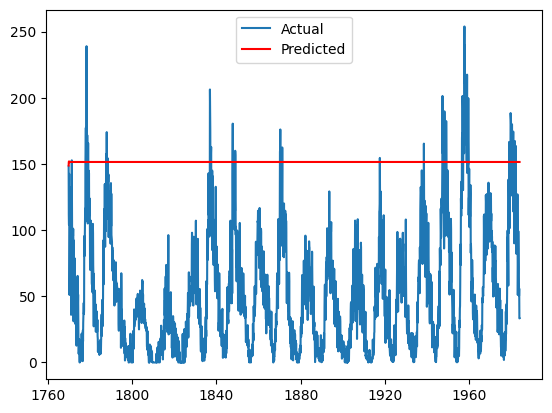

In [31]:
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()

<Axes: xlabel='Month'>

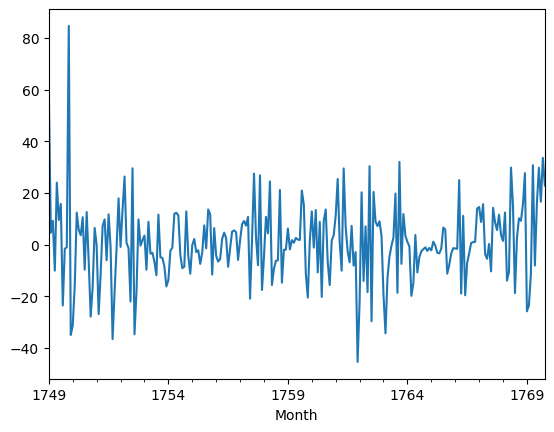

In [32]:
residuals = model_fit.resid
residuals.plot()

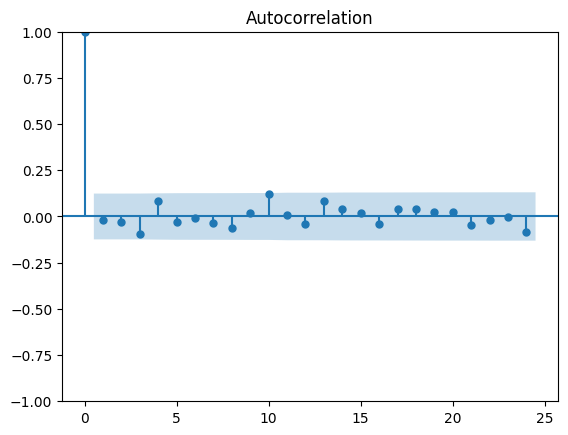

In [33]:
a=plot_acf(residuals, ax=plt.gca())

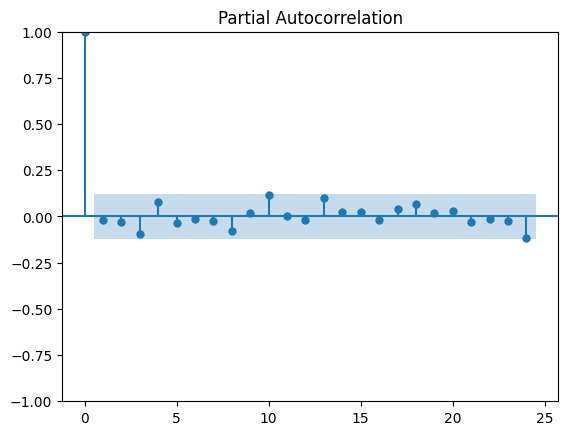

In [34]:
b=plot_pacf(residuals, ax=plt.gca())